<img src="https://media4.giphy.com/media/3o85xt08p2Y0hanhwQ/giphy.gif" alt="Yelp Critic" title="Yelp Critic" />

In [2]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load in Data

In [3]:
df = pd.read_json("nlp_yelp_reviews/data/yelp_academic_dataset_review.json", lines=True)
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [4]:
df = df.drop(['review_id', 'user_id', 'business_id', 'date'], axis=1)
df

,stars,useful,funny,cool,text
0,3,0,0,0,"If you decide to eat here, just be aware it is..."
1,5,1,0,1,I've taken a lot of spin classes over the year...
2,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...
3,5,1,0,1,"Wow! Yummy, different, delicious. Our favo..."
4,4,1,0,1,Cute interior and owner (?) gave us tour of up...
...,...,...,...,...,...
6990275,5,1,2,1,Latest addition to services from ICCU is Apple...
6990276,5,2,1,2,"This spot offers a great, affordable east week..."
6990277,4,1,0,0,This Home Depot won me over when I needed to g...
6990278,5,1,0,0,For when I'm feeling like ignoring my calorie-...


In [5]:
df = df.head(500)

Text(0.5, 0, 'review stars')

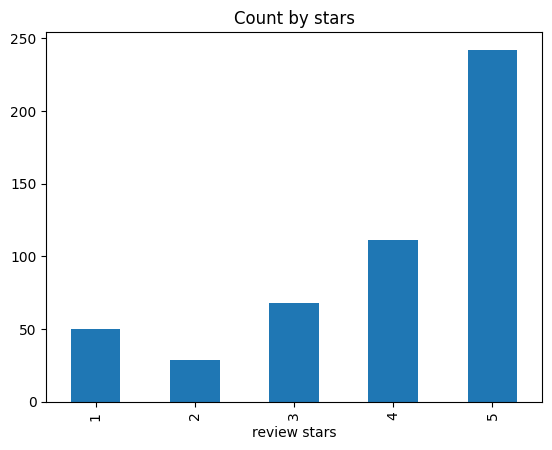

In [6]:
ax = df['stars'].value_counts().sort_index().plot(kind='bar', title='Count by stars')
ax.set_xlabel('review stars')

# Vaders Sentiment Analysis

In [7]:
sia = SentimentIntensityAnalyzer()

In [8]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    res[i] = sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
vaders = pd.DataFrame(res).T
vaders.reset_index().rename(columns={'index': 'Id'})
vaders = pd.concat([df, vaders], axis=1)
vaders

,stars,useful,funny,cool,text,neg,neu,pos,compound
0,3,0,0,0,"If you decide to eat here, just be aware it is...",0.000,0.888,0.112,0.8597
1,5,1,0,1,I've taken a lot of spin classes over the year...,0.050,0.705,0.245,0.9858
2,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,0.035,0.709,0.257,0.9201
3,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",0.000,0.660,0.340,0.9588
4,4,1,0,1,Cute interior and owner (?) gave us tour of up...,0.017,0.711,0.272,0.9804
...,...,...,...,...,...,...,...,...,...
495,3,2,0,0,Went for a bachelorette party on a Saturday ni...,0.016,0.842,0.142,0.8977
496,5,0,0,1,Hands down best fall off the bone BBQ I've eve...,0.000,0.654,0.346,0.9612
497,1,0,0,0,It's a good thing I've had a few weeks to cool...,0.072,0.829,0.099,0.3632
498,5,0,0,0,Best shrimp and grits in NOLA! Delicious fresh...,0.000,0.630,0.370,0.9402


Text(0.5, 1.0, 'Compound Score by Yelp Stars Review')

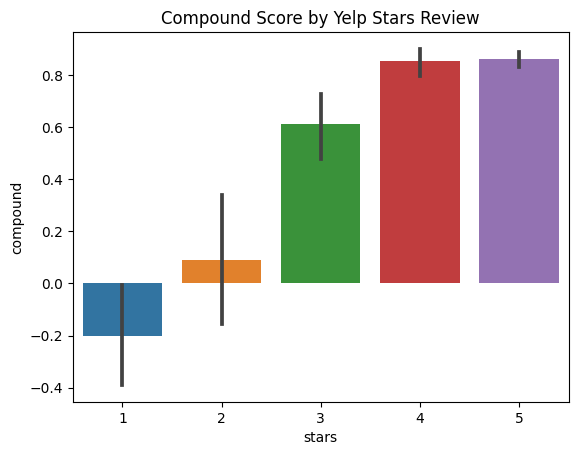

In [10]:
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compound Score by Yelp Stars Review')

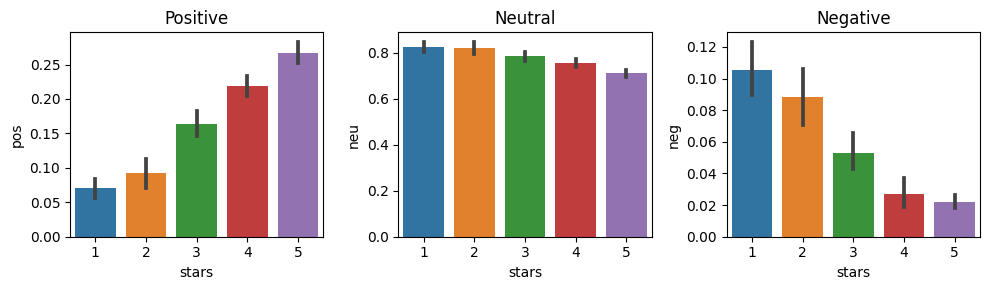

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Textblob Sentiment Analysis

In [12]:
tb_res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    blob = TextBlob(row['text'])

    tb_res[i] = blob.sentiment

  0%|          | 0/500 [00:00<?, ?it/s]

In [13]:
tb_df = pd.DataFrame(tb_res).T
tb_df = tb_df.rename(columns={0: "blob_polarity", 1: "blob_subjectivity"})
tb_df

,blob_polarity,blob_subjectivity
0,0.085278,0.429028
1,0.402273,0.571212
2,0.139935,0.522294
3,0.302557,0.713068
4,0.400969,0.490918
...,...,...
495,0.101620,0.357568
496,0.531349,0.541270
497,0.036706,0.500595
498,0.660000,0.420000


In [25]:
tb_vaders = pd.concat([vaders, tb_df], axis=1)
tb_vaders = tb_vaders.rename(columns={"neg": "vader_neg", "neu": "vader_neu", "pos": "vader_pos", 
                                      "compound": "vader_compound"})
tb_vaders

,stars,useful,funny,cool,text,vader_neg,vader_neu,vader_pos,vader_compound,blob_polarity,blob_subjectivity
0,3,0,0,0,"If you decide to eat here, just be aware it is...",0.000,0.888,0.112,0.8597,0.085278,0.429028
1,5,1,0,1,I've taken a lot of spin classes over the year...,0.050,0.705,0.245,0.9858,0.402273,0.571212
2,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,0.035,0.709,0.257,0.9201,0.139935,0.522294
3,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",0.000,0.660,0.340,0.9588,0.302557,0.713068
4,4,1,0,1,Cute interior and owner (?) gave us tour of up...,0.017,0.711,0.272,0.9804,0.400969,0.490918
...,...,...,...,...,...,...,...,...,...,...,...
495,3,2,0,0,Went for a bachelorette party on a Saturday ni...,0.016,0.842,0.142,0.8977,0.101620,0.357568
496,5,0,0,1,Hands down best fall off the bone BBQ I've eve...,0.000,0.654,0.346,0.9612,0.531349,0.541270
497,1,0,0,0,It's a good thing I've had a few weeks to cool...,0.072,0.829,0.099,0.3632,0.036706,0.500595
498,5,0,0,0,Best shrimp and grits in NOLA! Delicious fresh...,0.000,0.630,0.370,0.9402,0.660000,0.420000


# RoBERTa Sentiment Analysis

In [15]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [16]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [17]:
# Run for RoBERTa Model
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [18]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['text']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}

        res[i] = both
    except Exception as e:
        print(f'Broke with error {e} on id {i}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke with error The expanded size of the tensor (788) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 788].  Tensor sizes: [1, 514] on id 200
Broke with error index out of range in self on id 287
Broke with error The expanded size of the tensor (643) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 643].  Tensor sizes: [1, 514] on id 347
Broke with error The expanded size of the tensor (552) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 552].  Tensor sizes: [1, 514] on id 358
Broke with error The expanded size of the tensor (604) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 604].  Tensor sizes: [1, 514] on id 382
Broke with error The expanded size of the tensor (685) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 685].  Tensor sizes: [1, 514] on id 444
Broke with error The expanded size of the tensor (6

In [19]:
results_df = pd.DataFrame(res).T
results_df.reset_index().rename(columns={'index': 'Id'})
results_df = pd.concat([df, results_df], axis=1)
results_df

,stars,useful,funny,cool,text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,3,0,0,0,"If you decide to eat here, just be aware it is...",0.000,0.888,0.112,0.8597,0.061117,0.221228,0.717655
1,5,1,0,1,I've taken a lot of spin classes over the year...,0.050,0.705,0.245,0.9858,0.005421,0.058778,0.935801
2,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,0.035,0.709,0.257,0.9201,0.001187,0.036421,0.962392
3,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",0.000,0.660,0.340,0.9588,0.001735,0.011915,0.986350
4,4,1,0,1,Cute interior and owner (?) gave us tour of up...,0.017,0.711,0.272,0.9804,0.001854,0.016004,0.982143
...,...,...,...,...,...,...,...,...,...,...,...,...
495,3,2,0,0,Went for a bachelorette party on a Saturday ni...,0.016,0.842,0.142,0.8977,0.008322,0.045384,0.946294
496,5,0,0,1,Hands down best fall off the bone BBQ I've eve...,0.000,0.654,0.346,0.9612,0.001575,0.012304,0.986120
497,1,0,0,0,It's a good thing I've had a few weeks to cool...,0.072,0.829,0.099,0.3632,0.650319,0.256679,0.093001
498,5,0,0,0,Best shrimp and grits in NOLA! Delicious fresh...,0.000,0.630,0.370,0.9402,0.001400,0.017121,0.981480


In [20]:
results_df.columns

Index(['stars', 'useful', 'funny', 'cool', 'text', 'vader_neg', 'vader_neu',
       'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos'],
      dtype='object')

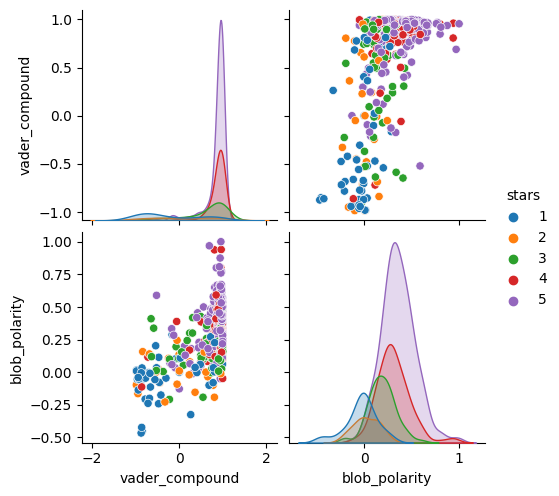

In [26]:
sns.pairplot(data=tb_vaders,
            vars=['vader_compound', 'blob_polarity'],
            hue='stars',
            palette='tab10')
plt.show()

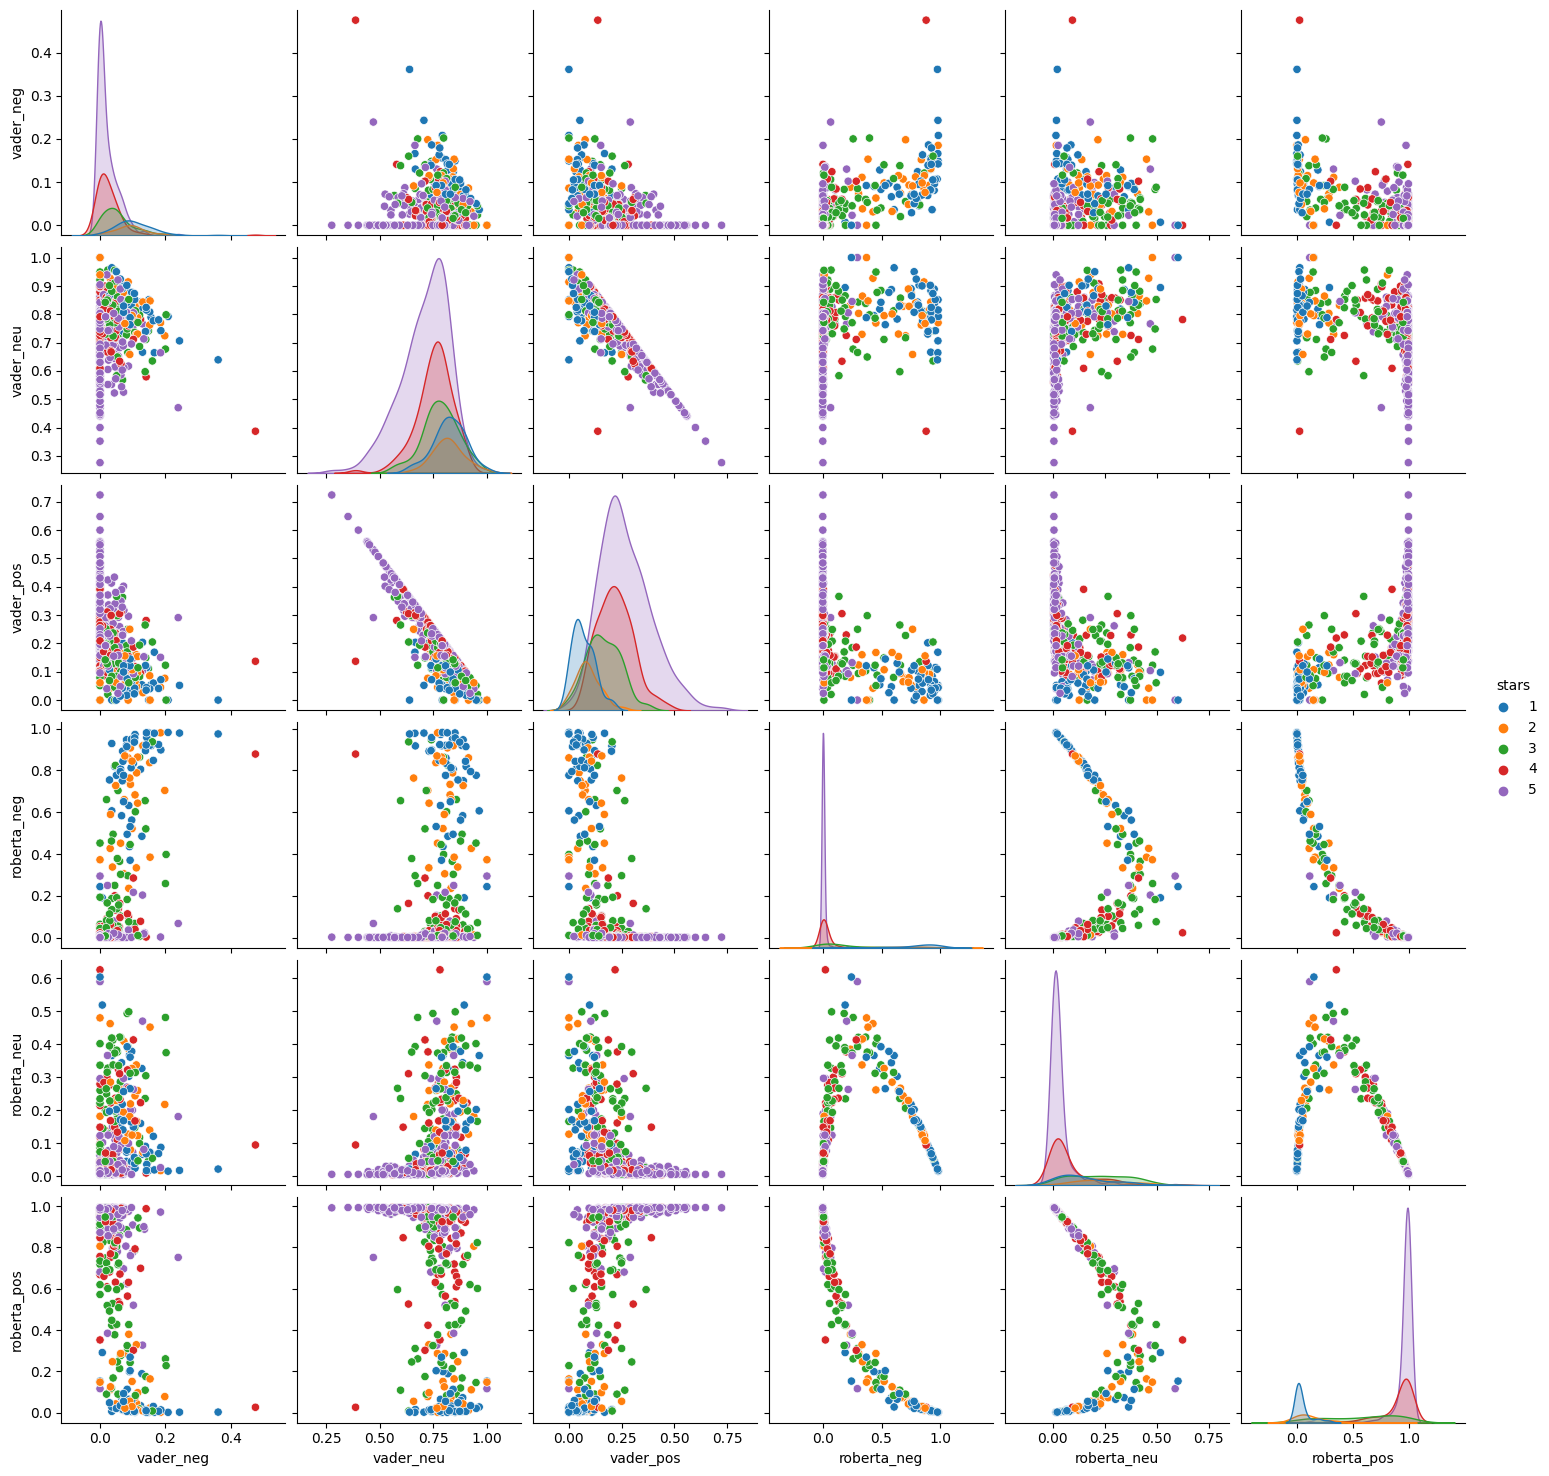

In [21]:
sns.pairplot(data=results_df,
            vars=['vader_neg', 'vader_neu', 'vader_pos', 
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars',
            palette='tab10')
plt.show()

In [31]:
all_results_df = pd.concat([results_df, tb_df], axis=1)
all_results_df.to_csv("sentiment_analysis_yelp.csv")

In [32]:
all_results_df

,stars,useful,funny,cool,text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,blob_polarity,blob_subjectivity
0,3,0,0,0,"If you decide to eat here, just be aware it is...",0.000,0.888,0.112,0.8597,0.061117,0.221228,0.717655,0.085278,0.429028
1,5,1,0,1,I've taken a lot of spin classes over the year...,0.050,0.705,0.245,0.9858,0.005421,0.058778,0.935801,0.402273,0.571212
2,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,0.035,0.709,0.257,0.9201,0.001187,0.036421,0.962392,0.139935,0.522294
3,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",0.000,0.660,0.340,0.9588,0.001735,0.011915,0.986350,0.302557,0.713068
4,4,1,0,1,Cute interior and owner (?) gave us tour of up...,0.017,0.711,0.272,0.9804,0.001854,0.016004,0.982143,0.400969,0.490918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3,2,0,0,Went for a bachelorette party on a Saturday ni...,0.016,0.842,0.142,0.8977,0.008322,0.045384,0.946294,0.101620,0.357568
496,5,0,0,1,Hands down best fall off the bone BBQ I've eve...,0.000,0.654,0.346,0.9612,0.001575,0.012304,0.986120,0.531349,0.541270
497,1,0,0,0,It's a good thing I've had a few weeks to cool...,0.072,0.829,0.099,0.3632,0.650319,0.256679,0.093001,0.036706,0.500595
498,5,0,0,0,Best shrimp and grits in NOLA! Delicious fresh...,0.000,0.630,0.370,0.9402,0.001400,0.017121,0.981480,0.660000,0.420000
